In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
path ="/content/insurance.csv"
insurance = pd.read_csv(path)
df = insurance.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploratory Data Analysis

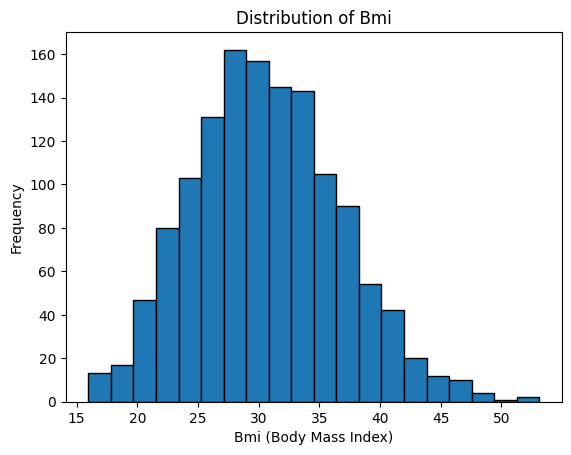

In [8]:
# the distribution of Bmi (Body Mass Index)
plt.hist(df['bmi'], bins=20, edgecolor='k')
plt.xlabel('Bmi (Body Mass Index)')
plt.ylabel('Frequency')
plt.title('Distribution of Bmi')
plt.show()

In [9]:
df.shape

(1338, 7)

In [10]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


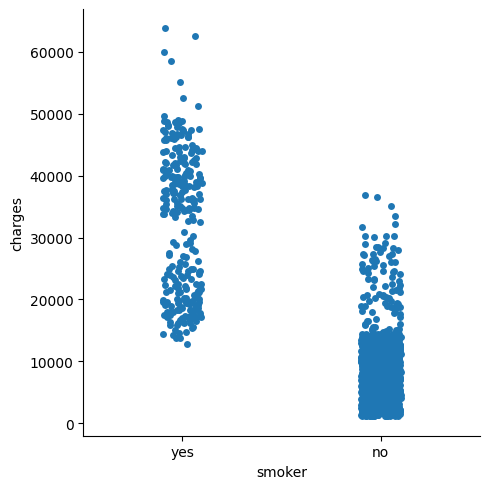

In [12]:
# the relationship between “smoker” and “charges”
sns.catplot(data=df, x="smoker", y="charges")

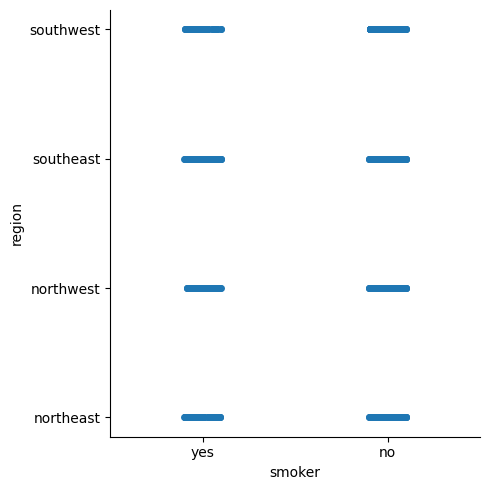

In [13]:
# the relationship between “smoker” and “region”
sns.catplot(data=df, x="smoker", y="region")

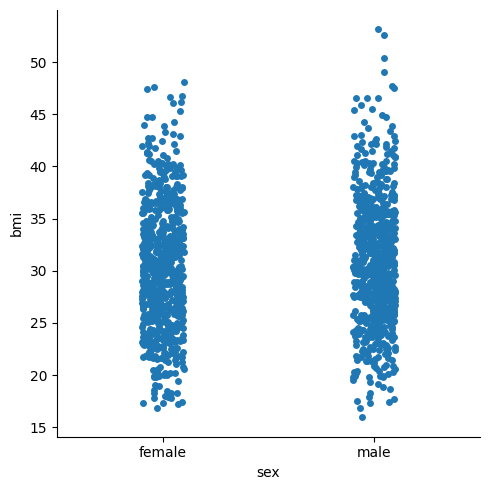

In [14]:
# the relationship between “bmi” and “sex”
sns.catplot(data=df, x="sex", y="bmi")

In [15]:
#  Group by the "children" column and sum the number of children for each "region"
grouped = df.groupby('region')['children'].sum()
# We can use the idxmax() function to find the "region" with the most children
region_with_most_children = grouped.idxmax()
# We can print the "region" with the most children
print("Region with the most children:", region_with_most_children)

Region with the most children: southeast


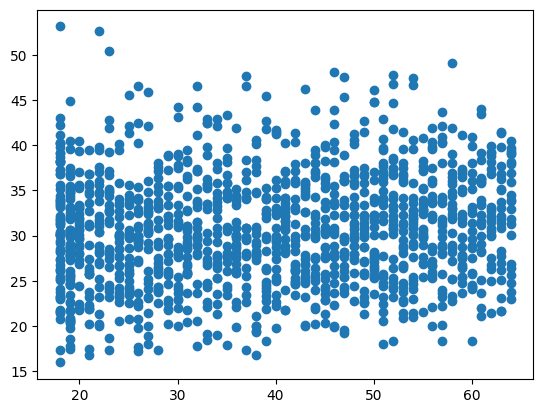

In [16]:
# the relationship between “age” and “bmi”
plt.scatter(df['age'],df['bmi'])

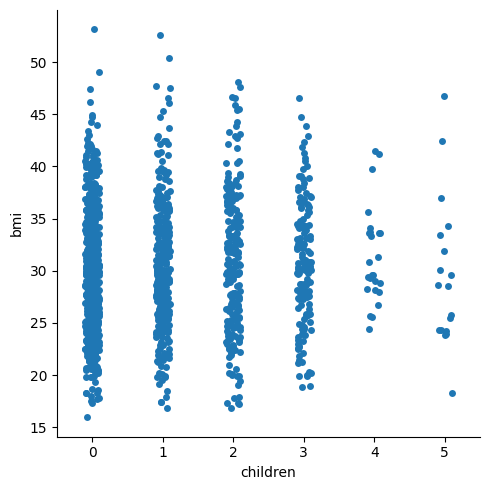

In [17]:
#  the relationship between “bmi” and “children”
sns.catplot(data=df, x="children", y="bmi")

In [18]:
# Let's get the basic statistical information of the "bmi" column:
statistics = df['bmi'].describe()
statistics

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [19]:
'''
A common method for identifying outliers is to consider as outliers those that are outside the interquartile
range (IQR) by 1.5 times the values in the "bmi" column.
The IQR is the difference between the 25th and 75th percentiles, respectively.
'''
Q1 = statistics['25%']
Q3 = statistics['75%']
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("lower bound: ",lower_bound)
print("upper bound: ",upper_bound)

lower bound:  13.7
upper bound:  47.290000000000006


In [20]:
# we can find the values that are outside the lower and upper limits
outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]
# We can print outliers
print("Outliers: ")
print(outliers)

Outliers: 
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


<Axes: xlabel='bmi'>

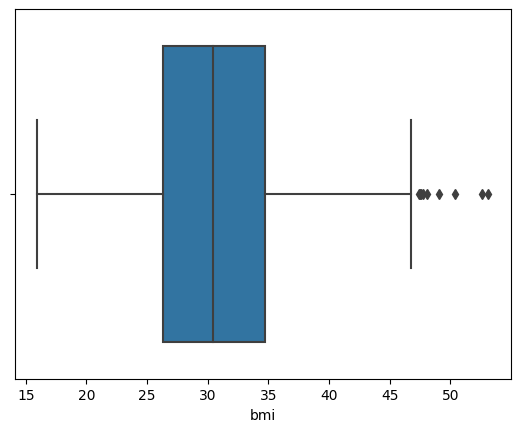

In [21]:
# Visualize outliers
sns.boxplot(x="bmi",data = df)

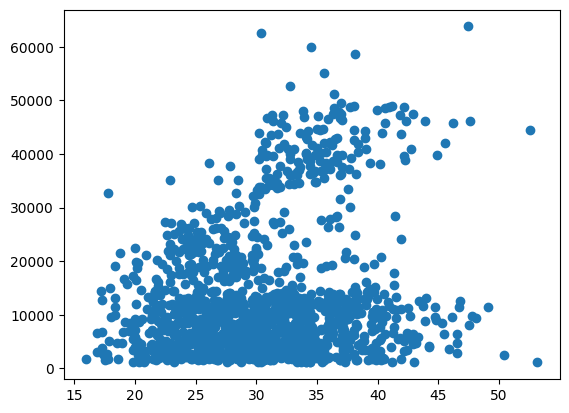

In [22]:
plt.scatter(df['bmi'],df['charges'])

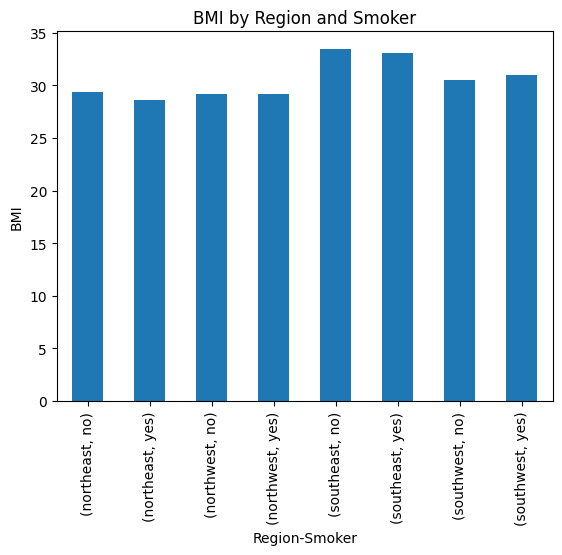

In [23]:
'''
Grouping the columns "region", "smoker" and "bmi",
let's calculate the mean or other statistics of "bmi" values according to the combinations of "region" and "smoker"
'''
grouped = df.groupby(['region', 'smoker'])['bmi'].mean()
# Let's draw the bar graph
grouped.plot(kind='bar')
plt.xlabel('Region-Smoker')
plt.ylabel('BMI')
plt.title('BMI by Region and Smoker')
plt.show()

## Data Preprocessing

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [26]:
# print categorical columns
categorical_cols = [i for i in df.columns if df[str(i)].dtype == "object" ]
print("Categorical columns: ",categorical_cols)

Categorical columns:  ['sex', 'smoker', 'region']


In [27]:
# print numerical columns
numerical_cols = [i for i in df.columns
                  if df[str(i)].dtype in ['int64', 'float64'] and i !="charges"]
print("Numerical columns: ",numerical_cols)

Numerical columns:  ['age', 'bmi', 'children']


In [28]:
print("Columns: ",df.columns)

Columns:  Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [29]:
data_features = list(df.columns)
X_features = [i for i in data_features if i !="charges"]
y = df.charges
print("Charges:")
print(y)


Charges:
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [30]:
X = df[X_features]
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [31]:
# Train - test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [32]:
X_train.head()

,age,sex,bmi,children,smoker,region
830,63,male,33.10,0,no,southwest
1330,57,female,25.74,2,no,southeast
793,53,male,20.90,0,yes,southeast
578,52,male,30.20,1,no,southwest
52,48,male,28.00,1,yes,southwest


In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
# scale the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('scaler', MinMaxScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='constant')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = XGBRegressor(max_depth = 3,
                     n_estimators = 50,
                     learning_rate = 0.2)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model
my_pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model',
                 X...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=50,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [34]:
y_pred =my_pipeline.predict(X_test)
y_pred

array([44352.9   ,  6701.407 ,  7503.321 ,  4657.9375,  4919.874 ,
       18120.64  ,  7373.2935, 35281.348 ,  3092.3633,  3625.0073,
       14634.056 ,  3442.1248, 21524.844 , 14081.024 , 24081.168 ,
        6520.6313,  9243.94  ,  7021.0176, 12335.833 , 13309.246 ,
        9317.261 ,  4515.369 , 10313.906 , 42993.05  ,  8529.57  ,
       16017.722 ,  3605.5303,  9832.234 ,  7126.0664, 14480.61  ,
        3900.8892,  6636.0225,  8091.0264,  8334.993 ,  6866.2505,
        9869.305 , 44704.4   , 21075.137 , 11896.05  ,  7555.6216,
       11219.545 , 15193.71  , 12913.076 ,  8884.578 ,  7706.941 ,
       23281.604 , 19407.266 ,  7145.446 , 47605.06  , 11510.023 ,
        9446.155 ,  6155.74  , 10110.565 ,  7996.531 , 34254.676 ,
        5536.48  , 38128.86  , 39019.707 , 40973.64  , 36479.742 ,
        6069.593 , 14176.058 , 11398.3955,  3516.638 ,  5277.914 ,
       10993.054 ,  3667.1523,  3191.198 ,  4114.4873,  2386.2393,
       12366.85  , 42952.777 ,  6757.19  ,  2989.1716, 18313.7

In [35]:
y_pred[:5]

array([44352.9   ,  6701.407 ,  7503.321 ,  4657.9375,  4919.874 ],
      dtype=float32)

In [36]:
y_test[:5]

629     42983.45850
408      6652.52880
687      5438.74910
1016     2709.24395
693      2352.96845
Name: charges, dtype: float64

In [37]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

2082.772476013366

In [38]:
from sklearn.metrics import r2_score

# r2_score
r2_score(y_test, y_pred)

0.9096170285820727

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import lightgbm as lgb


def model_selection(model):
    # Preprocessing for numerical data
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('scaler', MinMaxScaler())
    ])

    # Preprocessing for categorical data
    categorical_transformer = Pipeline(steps = [
        ('imputer',SimpleImputer(strategy='constant')),
        ('onehot',OneHotEncoder(handle_unknown='ignore'))
    ])

    # Bundle preprocessing for numerical and categorical data
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # Define model
    model = model

    # Bundle preprocessing and modeling code in a pipeline
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', model)
                                 ])

    # Preprocessing of training data, fit model
    my_pipeline.fit(X_train, y_train)

    #predict
    y_pred =my_pipeline.predict(X_test)

    mean_error = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test, y_pred)

    return mean_error, r2



In [40]:
print("(mean absolute error, r2_score)",model_selection(model = LinearRegression()))

(mean absolute error, r2_score) (3943.145113003196, 0.805494005723457)


In [41]:
print("(mean absolute error, r2_score)",model_selection(model = Ridge()))

(mean absolute error, r2_score) (3930.369468960726, 0.805067567229702)


In [42]:
print("(mean absolute error, r2_score)",model_selection(model = Lasso()))

(mean absolute error, r2_score) (3941.705929713903, 0.8054772498536924)


In [43]:
print("(mean absolute error, r2_score)",model_selection(model = ElasticNet()))

(mean absolute error, r2_score) (7089.519182901548, 0.42781474164123)


In [44]:
print("(mean absolute error, r2_score)",model_selection(model = lgb.LGBMRegressor(metric='mae')))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 11
[LightGBM] [Info] Start training from score 13293.734444
(mean absolute error, r2_score) (2448.1218298676913, 0.8946309416225647)


## Best model is XGBooatRegressor